# Data Science - Assignment 2

Dataset: <b>Census Income</b>

Thomas Bründl

se21m032

# Import necessary dependencies

In [252]:
import pandas as pd


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

# my imports 
import matplotlib.pyplot as plt
# sns.set_theme(style="ticks", color_codes=True)
import random 

%matplotlib inline

# Load raw data

In [253]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
raw_data = pd.read_csv('./census-income.data', sep=',',
names = ['age', 'class of worker', 'detailed industry recode', 'detailed occupation recode', 'education', 'wage per hour', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member', 'reason for unemployment', 'full or part time employment stat', 'capital gains', 'capital losses', 'dividends from stocks', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household',  'instance weight', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'num persons worked for employer', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', 'own business or self employed', 'fill inc questionnaire for veterans admin', 'veterans benefits', 'weeks worked in year', 'year', '???'])

# Show data

In [254]:

raw_data['wage per hour'] = raw_data['wage per hour'].apply(lambda value: value / 100)
raw_data['wage per hour'] = raw_data['wage per hour'].apply(lambda value: None if value == 0 else value)

raw_data['major industry code'] = raw_data['major industry code'].apply(lambda value: None if value == " Not in universe or children" else value)

raw_data['major industry code'] = raw_data['major industry code'].apply(lambda value: None if value == " Not in universe or children" else value)



raw_data.head(10)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,???
0,73,Not in universe,0,0,High school graduate,NaN,Not in universe,Widowed,None,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,NaN,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,NaN,High school,Never married,None,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,NaN,Not in universe,Never married,None,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,NaN,Not in universe,Never married,None,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
5,48,Private,40,10,Some college but no degree,12.00,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,162.61,?,?,?,Not in universe under 1 year old,?,1,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.
6,42,Private,34,3,Bachelors degree(BA AB BS),NaN,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,5178,0,0,Joint both under 65,Not in universe,Not in univ

# Factorize Data

In [255]:

newData = raw_data.copy(deep=True)

categoricalData = [
    'class of worker', 
    'education', 
    # 'marital stat',
    # 'major industry code',
    # 'major occupation code',
    'race', 
    'hispanic origin', 
    'sex', 
    # 'region of previous residence',
    'year'
]

numericData = [ 'age', 
                'wage per hour' ]

newHeaders = numericData + categoricalData

for column in categoricalData:
    newData[column] = pd.factorize(newData[column])[0] + 1

newData = newData[newHeaders]

pd.options.display.max_columns = None
pd.options.display.max_rows = None
newData.head(20)


,age,wage per hour,class of worker,education,race,hispanic origin,sex,year
0,73,NaN,1,1,1,1,1,1
1,58,NaN,2,2,1,1,2,2
2,18,NaN,1,3,2,1,1,1
3,9,NaN,1,4,1,1,1,2
4,10,NaN,1,4,1,1,1,2
5,48,12.00,3,2,3,1,1,1
6,42,NaN,3,5,1,1,2,2
7,28,NaN,3,1,1,1,1,1
8,47,8.76,4,2,1,1,1,1
9,34,NaN,3,2,1,1,2,2


# Dimensionality reduction

In [256]:

def parseFloatElementSafe(y):
    try:
        return float(y)
    except:
        return None

def parseFloat(x):
    return x.apply(lambda value: parseFloatElementSafe(value)) 

x = newData.head(20000)

b = x.apply(parseFloat)
b = b.dropna()
a = b.to_numpy()
print(a)
print(len(a))

[[48.   12.    3.   ...  1.    1.    1.  ]
 [47.    8.76  4.   ...  1.    1.    1.  ]
 [56.    5.    3.   ...  1.    1.    1.  ]
 ...
 [29.    6.25  3.   ...  1.    2.    2.  ]
 [33.    6.75  3.   ...  1.    2.    1.  ]
 [72.   13.    3.   ...  1.    1.    1.  ]]
1139


# Method 1: PCA

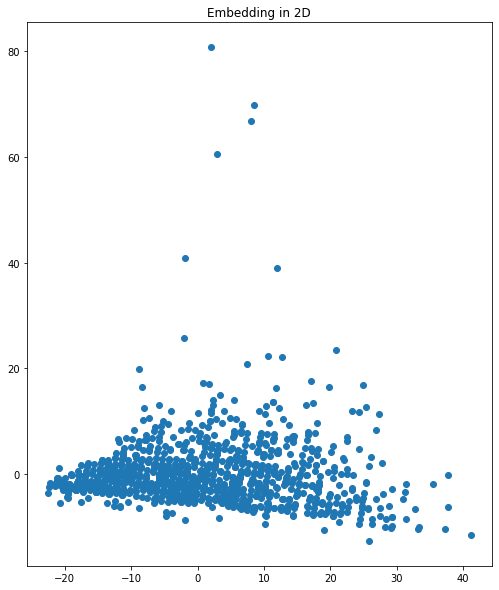

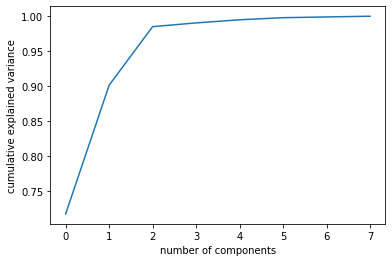

In [257]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(a)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

X_transform = principalDf.to_numpy()
#print(X_transform)

finalDf = principalDf

fig = plt.figure(2, (20,10))
# ax = fig.add_subplot(121, projection='3d')
# plt.scatter(X[:,0], X[:,1], zs=X[:,2], s=size, c=colors)
# plt.title('Original Points')

ax = fig.add_subplot(122)
plt.scatter(X_transform[:,0], X_transform[:,1])#, s=size, c=colors)
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

X = np.array(a)

pca = PCA(n_components=2)
pca = PCA().fit(X)

# >>> pca.fit(X)


# pca = PCA().fit(newData)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [258]:

varianceFirstComponent = round(pca.explained_variance_ratio_[0] * 100, 2)
varianceSecondComponent = round(pca.explained_variance_ratio_[1] * 100, 2)

print("The first component describes " + str(varianceFirstComponent) + "% of the variance.")
print("The second component describes " + str(varianceSecondComponent) + "% of the variance.")


The first component describes 71.7% of the variance.
The second component describes 18.43% of the variance.


# Method 2: MDS

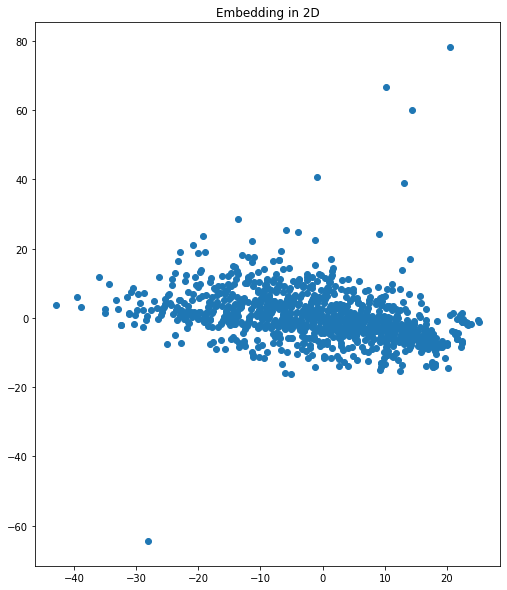

In [259]:
from sklearn.manifold import MDS

#print(a)
#print(len(a))
X = np.array(a)
mds = MDS(random_state=0)
X_transform = mds.fit_transform(X)

fig = plt.figure(2, (20,10))

ax = fig.add_subplot(122)
plt.scatter(X_transform[:,0], X_transform[:,1])#, s=size, c=colors)
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()